**2.-** El archivo lagartijas.csv contiene mediciones de 25 lagartijas de la especie Cophasaurus texanus. Donde:

• Mass: Es el peso en gramos.

• SVL: Es la longitud de la cola a la nariz.

• HLS: Es la longitud de la pata posterior.

El científico supone que las medidas que ha obtenido son suficientes para saber si hay diferencias significativas entre los especímenes del sexo masculino y femenino. El problema es que son muy pocos datos pues un muestreo de esta especie de animales resulta complicado. Para solventar esto siga los siguientes pasos:

**a)** Realice un análisis descriptivo multivariado de las medidas tomadas por el científico incluyendo covarianzas, correlaciones, vector de medias y una matriz de dispersiones diferenciando por hembras y machos. Luego use el paquete de python pingouin para aplicar una prueba de bondad de ajuste para la normal multivariada, por macho y hembras por separados. La liga con la documentación del paquete es https://pingouin-stats.org/build/html/index.html 

**b)** Sea $z=(Z_1,...,Z_p) \in \mathbb{R^p}$ un vector aleatorio tal que $Z_i \sim N(0,1)$.  Mostrar que si queremos producir un vector aleatorio $x\sim N_p(\mu , \Sigma)$ a partir de $z$ entonces le debemos aplicar la siguiente transformación:

$$x=\mu+[\Gamma \Lambda^{1/2}] [z]$$

Donde $\Lambda^{1/2} = diag(\sqrt{\lambda_1},...,\sqrt{\lambda_p})$

**c)** Con las matrices de covarianzas por hembas y machos, use el resultado del inciso anterior para generar datos sintéticos que simulen ser observaciones de cada sexo, luego realice las matrices de dispersiones con marcadores por separado para verificar que se han podido generar datos sintéticos con las mismas características de los datos originales reales.

**d)** Use los datos anteriores para detectar especimenes reales atípicos usando el método de la elipse, visualizando con un marcador especial en las matrices de dispersiones. Recuerde que esto es tanto para hembras como para machos por separado cada elipse.


**SOLUCIÓN**

Primero importaremos algunas bibliotecas, funciones y la base de datos de las lagartijas. Mostramos los primeros diez datos.   

In [1]:
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import numpy as np

pd.set_option('max_colwidth',100)
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
lagartijasPath = 'DataSets/lagartijas.csv'
lagartijas_df = pd.read_csv(lagartijasPath)
lagartijas_df.head(10)

,Lizard,Mass,SVL,HLS,Genero
0,1,5.526,59.0,113.5,f
1,2,10.401,75.0,142.0,m
2,3,9.213,69.0,124.0,f
3,4,8.953,67.5,125.0,f
4,5,7.063,62.0,129.5,m
5,6,6.610,62.0,123.0,f
6,7,11.273,74.0,140.0,m
7,8,2.247,47.0,97.0,f
8,9,15.493,86.5,162.0,m
9,10,9.004,69.0,126.0,f


**a)**  Análisis descriptivo, covarianzas, correlaciones, dispersiones y bondad de ajuste de la normal multivariada.

A continuación se muestra la matriz de covarianzas entre las tres variables numéricas de las características de las lagartijas Mass (el peso en gramos), SVL (longitud de cola a anariz) y HLS (longitud de pata posterior). 

Covariance matrix


<Axes: >

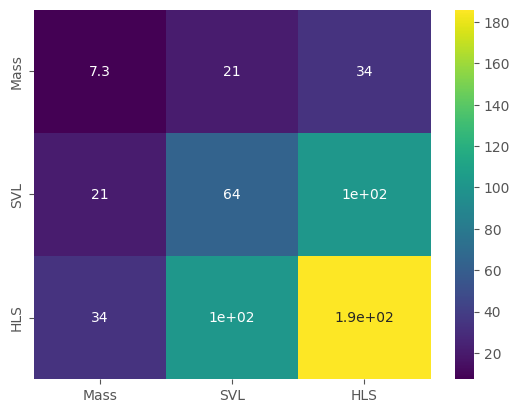

In [3]:
features = ['Mass','SVL','HLS']
print("Covariance matrix")
sns.heatmap(lagartijas_df[features].cov(),cmap="viridis", annot=True)

A continuación mostramos este mismo cuadro de covarianzas separando a las hembras de los machos. 


Covariance matrix - Male


<Axes: >

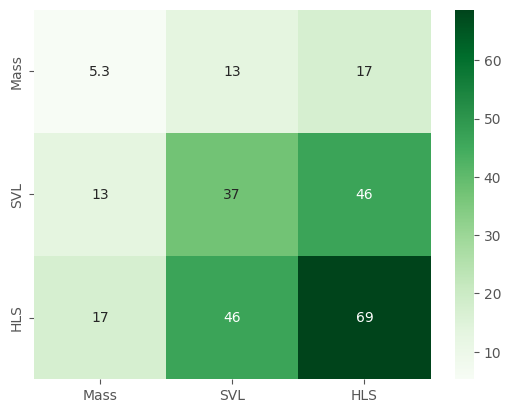

In [4]:
features = ['Mass','SVL','HLS']
print("Covariance matrix - Male")
cov_male=lagartijas_df[lagartijas_df['Genero']=='m'][features].cov()
sns.heatmap(lagartijas_df[lagartijas_df['Genero']=='m'][features].cov(),cmap="Greens", annot=True)


Covariance matrix - Female


<Axes: >

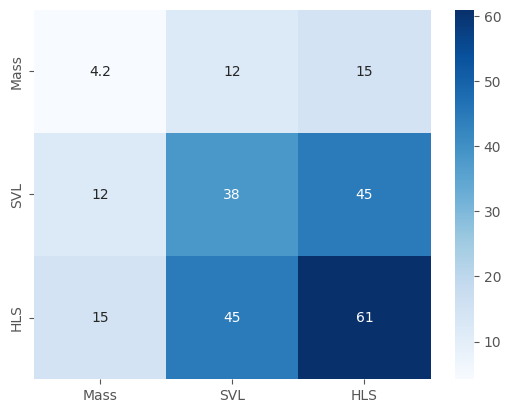

In [5]:
print("Covariance matrix - Female")
cov_female=lagartijas_df[lagartijas_df['Genero']=='f'][features].cov()
sns.heatmap(lagartijas_df[lagartijas_df['Genero']=='f'][features].cov(),cmap="Blues", annot=True)

A continuación mostramos la matriz de correlaciones de las tres variables numéricas. 

Correlation matrix


<Axes: >

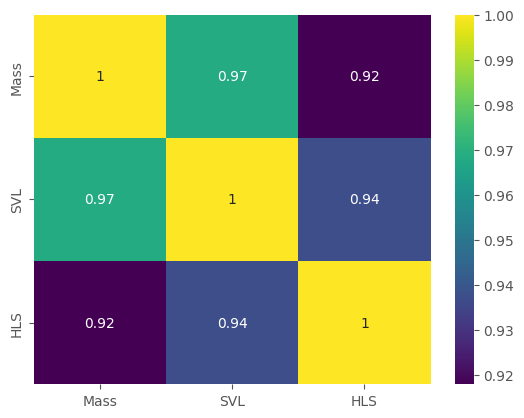

In [6]:
print("Correlation matrix")
sns.heatmap(lagartijas_df[features].corr(),cmap="viridis", annot=True)

A continuación se muestran estas matrices de correlación para lagartijas hembras y de machos por separado. 

Corrlation matrix - Male


<Axes: >

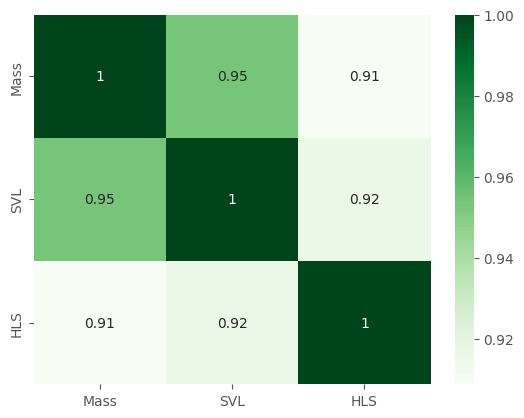

In [7]:
features = ['Mass','SVL','HLS']
print("Corrlation matrix - Male")
cor_male=lagartijas_df[lagartijas_df['Genero']=='m'][features].corr()
sns.heatmap(lagartijas_df[lagartijas_df['Genero']=='m'][features].corr(),cmap="Greens", annot=True)

Corrlation matrix - Female


<Axes: >

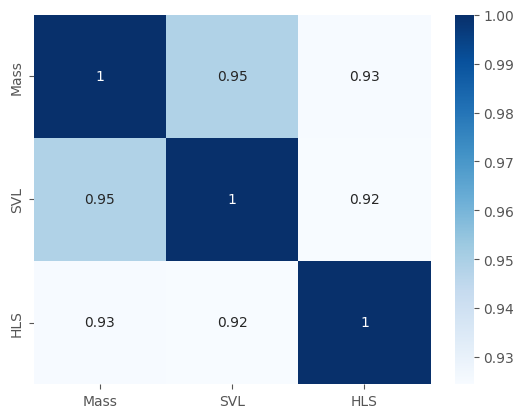

In [8]:
features = ['Mass','SVL','HLS']
print("Corrlation matrix - Female")
cor_male=lagartijas_df[lagartijas_df['Genero']=='f'][features].corr()
sns.heatmap(lagartijas_df[lagartijas_df['Genero']=='f'][features].corr(),cmap="Blues", annot=True)

A continuación se muestra la matriz de medias de las variables numericas.


In [9]:
print("Mean matrix")
lagartijas_means_df = lagartijas_df[features].mean()
lagartijas_means_df.to_dict()

Mean matrix


{'Mass': 8.678604, 'SVL': 68.4, 'HLS': 129.3}

A continuación mostramos esta misma medida de tendencia central para hembras y machos separadamente.

In [10]:
print("Mean matrix - Male")
lagartijas_means_male_df = lagartijas_df[lagartijas_df['Genero']=='m'][features].mean()
lagartijas_means_male_df.to_dict()


Mean matrix - Male


{'Mass': 10.232769230769232,
 'SVL': 73.34615384615384,
 'HLS': 139.76923076923077}

In [11]:
print("Mean matrix - Female")
lagartijas_means_female_df = lagartijas_df[lagartijas_df['Genero']=='f'][features].mean()
lagartijas_means_female_df.to_dict()

Mean matrix - Female


{'Mass': 6.994924999999999,
 'SVL': 63.041666666666664,
 'HLS': 117.95833333333333}

Scatter plots matrix


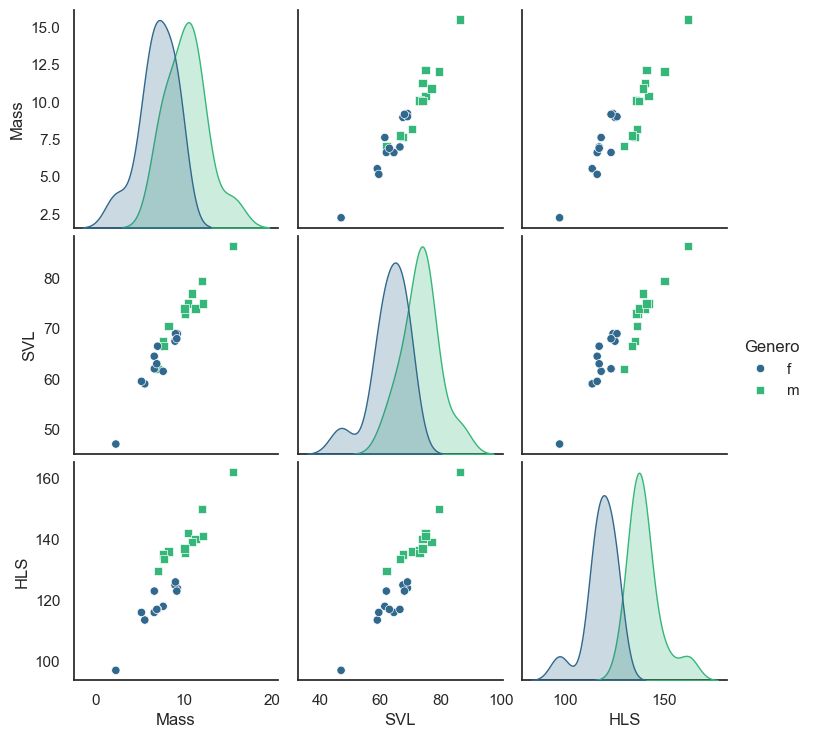

In [12]:
print("Scatter plots matrix")
features = ['Mass','SVL','HLS', 'Genero']
sns.set_theme(style="white", palette=None)
smp = sns.pairplot(lagartijas_df[features],hue="Genero",diag_kind='kde',palette="viridis", markers=["o", "s"])


Datos centrados

In [13]:
#Método 1
n = len(lagartijas_df)
nn_1 = []
for i in range(0,n):
    nn_1.append([1]*n)
nn_1 = np.matrix(nn_1)
H = np.matrix(np.identity(n))-(1/n)*nn_1
features = ['Mass','SVL','HLS']
X = np.matrix(lagartijas_df[features].values)
X_centered = np.dot(H,X)
columns = [features]
centered_lagartijas_df = pd.concat([pd.DataFrame(X_centered,columns=columns),lagartijas_df[['Genero']]],axis=1)
centered_lagartijas_df.head(10)

,"(Mass,)","(SVL,)","(HLS,)",Genero
0,-3.152604,-9.4,-15.8,f
1,1.722396,6.6,12.7,m
2,0.534396,0.6,-5.3,f
3,0.274396,-0.9,-4.3,f
4,-1.615604,-6.4,0.2,m
5,-2.068604,-6.4,-6.3,f
6,2.594396,5.6,10.7,m
7,-6.431604,-21.4,-32.3,f
8,6.814396,18.1,32.7,m
9,0.325396,0.6,-3.3,f


In [14]:
#Método 2
def getCenteredDataMatrix(data_df,columns,keys):
    data_df = data_df.copy()
    meanVector = data_df[columns].mean().to_dict()
    for col in columns:
        data_df['centered_'+col] = data_df[col]-meanVector[col]
    return data_df[keys+['centered_'+col for col in columns]]

In [15]:
features = ['Mass','SVL','HLS']
columns = features
keys = ['Genero']
centered_lagartijas_df = getCenteredDataMatrix(lagartijas_df,columns,keys)
centered_lagartijas_df.head(10)

,Genero,centered_Mass,centered_SVL,centered_HLS
0,f,-3.152604,-9.4,-15.8
1,m,1.722396,6.6,12.7
2,f,0.534396,0.6,-5.3
3,f,0.274396,-0.9,-4.3
4,m,-1.615604,-6.4,0.2
5,f,-2.068604,-6.4,-6.3
6,m,2.594396,5.6,10.7
7,f,-6.431604,-21.4,-32.3
8,m,6.814396,18.1,32.7
9,f,0.325396,0.6,-3.3


Discriminant power

<Figure size 1000x1000 with 0 Axes>

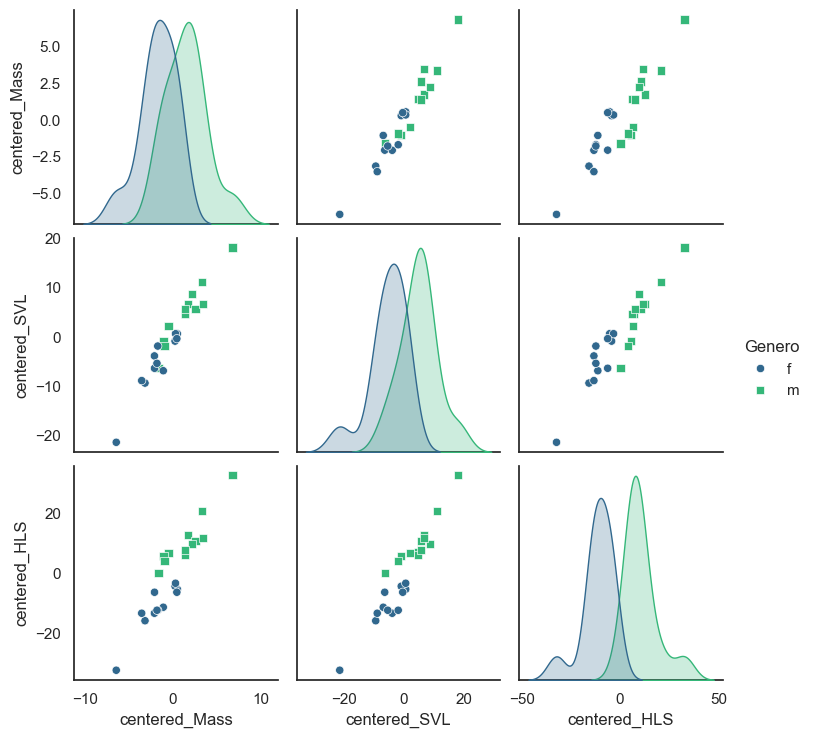

In [16]:
plt.figure(figsize=(10,10))
sns.pairplot(centered_lagartijas_df,hue="Genero",diag_kind='kde',palette="viridis", markers=["o", "s"])

Comparativo para Mass

<Axes: xlabel='centered_Mass', ylabel='Density'>

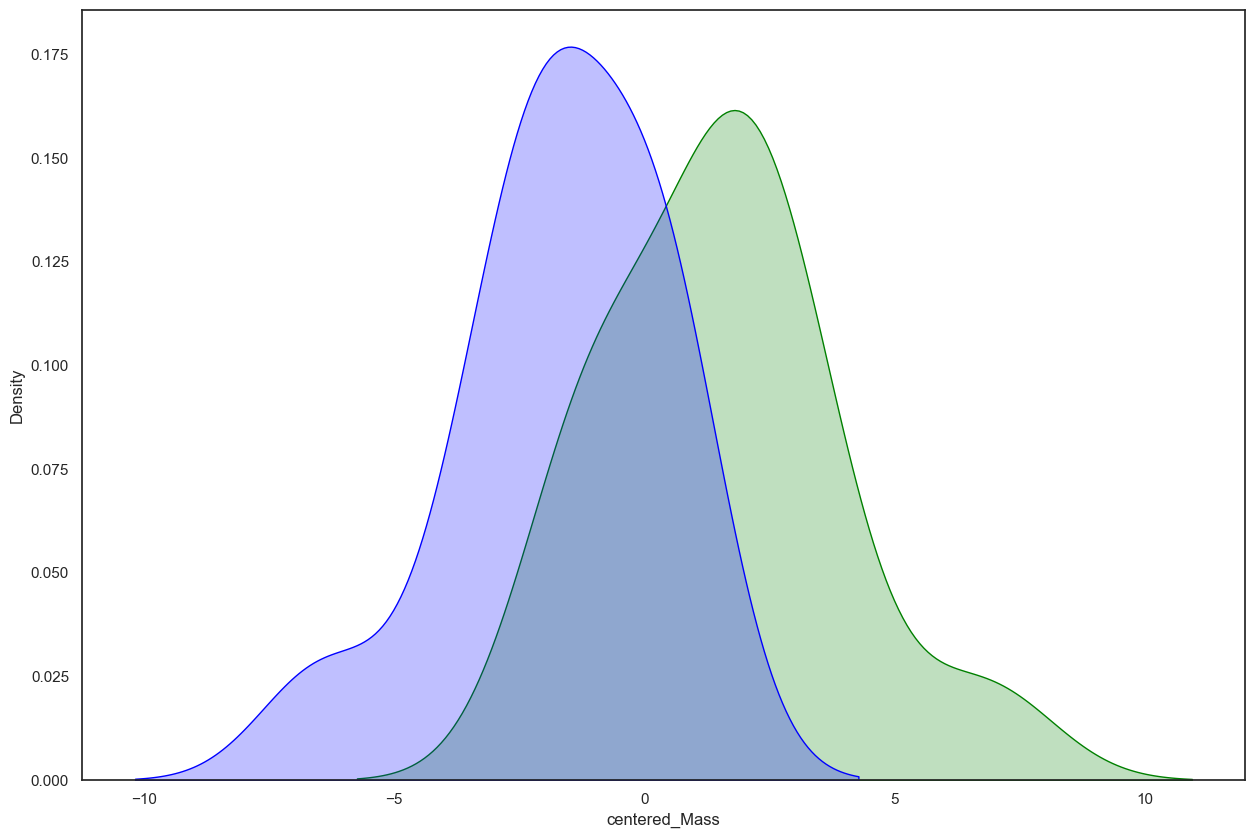

In [17]:
feature = 'centered_Mass'
gen_1='m'
gen_2='f'
plt.figure(figsize=(15,10))
sns.kdeplot(centered_lagartijas_df[centered_lagartijas_df['Genero']==gen_1][feature],shade=True,color='green',label='male')
sns.kdeplot(centered_lagartijas_df[centered_lagartijas_df['Genero']==gen_2][feature],shade=True,color='blue',label='female')

Prueba de bondad de ajuste normal multivariada.

La siguiente prueba de Henze-Zirkler para normalidad multivariada, muestra un p-value de 0.5098, el cual es menor a un nivel de significancia estadística de 0.05 o incluso si toleramos un nivel de significancia de 0.1. Esto significa que no hay suficiente evidencia para rechazar la hipótesis nula de normalidad multivariada de nuestros datos.   

In [18]:
#pip install pingouin

In [19]:
import pingouin as pg
features = ['Mass','SVL','HLS']
X = np.matrix(lagartijas_df[features].values)
pg.multivariate_normality(X, alpha=.05)
#Ho:Multivariate Normality VS Ha: NO multivariate normality

HZResults(hz=0.5761132088537027, pval=0.509839442431791, normal=True)

Si hacemos este mismo análisis para los machos tenemos que no es posible rechazar la hipótesis nula de normalidad multivariada a un nivel de significancia de 0.05. Aunque cabe señalar que si establecemos un nivel de significancia de 0.1, se estaría rechazando la hipótesis nula de normalidad multivariada.

In [20]:
X1 = np.matrix(lagartijas_df[lagartijas_df['Genero']=='m'][features].values)
pg.multivariate_normality(X1, alpha=.05)

HZResults(hz=0.7351505298691865, pval=0.07682228576558461, normal=True)

Por otro lado, para hembras tenemos que no es posible rechazar la hipótesis nula de normalidad multivariada a un nivel de significancia de 0.05 o de 0.1. 

In [21]:
X2 = np.matrix(lagartijas_df[lagartijas_df['Genero']=='f'][features].values)
pg.multivariate_normality(X2, alpha=.05)

HZResults(hz=0.6622442946375375, pval=0.14205503058496916, normal=True)

**b)** Mostrar que podemos obtener el vector aleatorio $x\sim N_p(\mu,\Sigma)$, a partir del vector aleatorio $z=(Z_1,...,Z_p)$ donde cada elemento $Z_i \sim N(0,1)$, con la transformación $x=\mu+[\Gamma \Lambda^{1/2}] [z]$ 



SOLUCION:

Recordemos que la función de densidad conjunta normal multivariada es $f_{X_1 ,..., X_p }(x_1,...,x_p)=\left(\frac{1}{2\pi}\right)^{p/2}|\Sigma|^{-1/2}\exp\{-\frac{1}{2}(\textbf{x}-\mathbf{\mu})'\Sigma^{-1}(\textbf{x}-\mathbf{\mu})\}$

Donde $|\Sigma|$ es el determinante de la matriz de covarianzas; $\mu \in \mathbb{R}^n$ es el vector de medias. 

Además, $\Lambda^{1/2} = diag(\sqrt{\lambda_1},...,\sqrt{\lambda_p})$ con $\lambda_i$ son los valores propios de $\Sigma$; y $\Gamma=(\gamma_{(1)}, ... , \gamma_{(p)})$ con $\gamma_{(i)}$ los vectores propios de $\Sigma$. 

La transformación $T:\mathbb{R}^n \rightarrow \mathbb{R}^n$ es $x=T[Z] = \mu+[\Gamma \Lambda^{1/2}] [z]$, de donde:

$z=T^{-1}[x]=[\Gamma \Lambda^{1/2}]^{-1} (x-\mu)$

$T^{-1}$ existe solo si la inversa de $[\Gamma \Lambda^{1/2}]$ también existe. 

Encontraremos la función de densidad conjunta de $x$. Por el teorema de cambio de variable tenemos que: 

$$f_X(x_1,...,x_p)=f_Z(T^{-1}(x))| \frac{\partial}{\partial x} T^{-1} (x) |, \hspace{0.2cm}  si \hspace{0.2cm} x \in Rango(T(Z))$$  


Veamos que: 

$| \frac{\partial}{\partial x} T^{-1} (x) |= | \frac{\partial}{\partial x}  [\Gamma \Lambda^{1/2}]^{-1} (x-\mu)| = | \frac{\partial}{\partial x}  [\Gamma \Lambda^{1/2}]^{-1} x - \frac{\partial}{\partial x}  [\Gamma \Lambda^{1/2}]^{-1} \mu| = | [\Gamma \Lambda^{1/2}]^{-1} \frac{\partial}{\partial x}x -  [\Gamma \Lambda^{1/2}]^{-1} \mu \frac{\partial}{\partial x} | = |[\Gamma \Lambda^{1/2}]^{-1} - 0| = \frac{1}{|\Gamma \Lambda^{1/2}|}$


Por lotra parte, como $z$ es un vector aleatorio con entradas i.i.d., normal estándar, su función de densidad puede ser calculada con el productos de las funciones de densidad marginales individuales. 

$f_Z(z_1,...,z_p)=\Pi_{k=0}^p f_{z_k}(z_k)= \Pi_{k=0}^p (\frac{1}{\sqrt{2\pi}} exp(-\frac{1}{2} z_k^2)) = (\frac{1}{\sqrt{2\pi}})^p exp(-\frac{1}{2} \sum_{k=1}^p z_k^2) = (\frac{1}{\sqrt{2\pi}})^p exp(-\frac{1}{2} z \prime  z) = (\frac{1}{\sqrt{2\pi}})^p exp(-\frac{1}{2} T^{-1} \prime  (x) T^{-1}(x))$

De donde:

$T^{-1} \prime (x) T^{-1}(x) = ([\Gamma \Lambda^{1/2}]^{-1} (x-\mu))\prime ([\Gamma \Lambda^{1/2}]^{-1} (x-\mu)) = (x-\mu)\prime ([\Gamma \Lambda^{1/2}]^{-1} \prime [\Gamma \Lambda^{1/2}]^{-1}) (x-\mu) = (x-\mu)\prime ([\Gamma \Lambda^{1/2}] [\Gamma \Lambda^{1/2}]\prime )^{-1} (x-\mu) = (x-\mu)\prime \Sigma^{-1} (x-\mu)$

Notemos que:

$|\Gamma \Lambda^{1/2}|= \sqrt{|\Gamma \Lambda^{1/2}||\Gamma \Lambda^{1/2}|} = \sqrt{|\Gamma \Lambda^{1/2}||(\Gamma \Lambda^{1/2})\prime|} = \sqrt{|\Gamma \Lambda^{1/2}(\Gamma \Lambda^{1/2})\prime|} =\sqrt{|\Gamma \Lambda^{1/2}( \Lambda^{1/2}\prime \Gamma \prime)|}= \sqrt{|\Gamma \Lambda \Gamma \prime|} = \sqrt{|\Sigma|} = |\Sigma|^{1/2}$

$|[\Gamma \Lambda^{1/2}]^{-1}| = \frac{1}{|\Gamma \Lambda^{1/2}|} = \frac{1}{|\Sigma|^{1/2}} = |\Sigma|^{-1/2}$


Por lo tanto, tenemos que:

$$f_X(x_1,...,x_p)=f_Z(T^{-1}(x))| \frac{\partial}{\partial x} T^{-1} (x) |= \left(\frac{1}{2\pi}\right)^{p/2}|\Sigma|^{-1/2}\exp\{-\frac{1}{2}(\textbf{x}-\mathbf{\mu})'\Sigma^{-1}(\textbf{x}-\mathbf{\mu})\}$$ 

La cual es la función de densidad normal multivariada. 

**c)** Generar datos sintéticos por sexo. 

In [22]:
def getMvNormalSample(mu,sigma,n):
    columns = ['x'+str(i+1) for i in range(0,len(mu))]
    return pd.DataFrame(np.random.multivariate_normal(mu,sigma,n),columns=columns)

In [23]:
n=50
mu_male=lagartijas_means_male_df
sigma_male = cov_male
alpha_0=0.05
degreesFreedom=len(mu_male)
mvd_normal_sample_male_df = getMvNormalSample(mu_male,sigma_male,n)
mvd_normal_sample_male_df.rename(columns = {'x1':'Mass', 'x2':'SVL', 'x3':'HLS'}, inplace = True)
mvd_normal_sample_male_df['Genero'] = 'm'
mvd_normal_sample_male_df.head(10)

,Mass,SVL,HLS,Genero
0,11.447623,79.382042,144.872363,m
1,13.771755,84.155193,156.688737,m
2,11.359944,74.946948,144.252402,m
3,10.320015,73.549572,135.915189,m
4,12.044425,78.412693,144.003051,m
5,12.250992,80.860363,151.974302,m
6,11.201230,73.567977,143.303772,m
7,8.671236,67.614807,135.121774,m
8,13.316928,79.025441,152.074993,m
9,8.239934,71.274444,134.876579,m


In [24]:
n=50
mu_female=lagartijas_means_female_df
sigma_female = cov_female
alpha_0=0.05
degreesFreedom=len(mu_female)
mvd_normal_sample_female_df = getMvNormalSample(mu_female,sigma_female,n)
mvd_normal_sample_female_df.rename(columns = {'x1':'Mass', 'x2':'SVL', 'x3':'HLS'}, inplace = True)
mvd_normal_sample_female_df['Genero'] = 'f'
mvd_normal_sample_female_df.head(10)

,Mass,SVL,HLS,Genero
0,5.286033,57.114254,112.923728,f
1,4.081607,53.826626,109.808509,f
2,6.314195,59.691029,115.377323,f
3,7.187053,64.346308,123.427183,f
4,11.332242,75.320638,132.394913,f
5,9.146717,73.168711,126.756742,f
6,9.892166,70.075086,131.022194,f
7,6.382379,57.338584,111.358163,f
8,6.289195,63.441046,115.590923,f
9,6.469474,59.165160,111.752948,f


In [25]:
import pandas as pd
mvd_normal_sample = pd.concat([mvd_normal_sample_female_df, mvd_normal_sample_male_df])

Scatter plots matrix - MVD Normal Sample


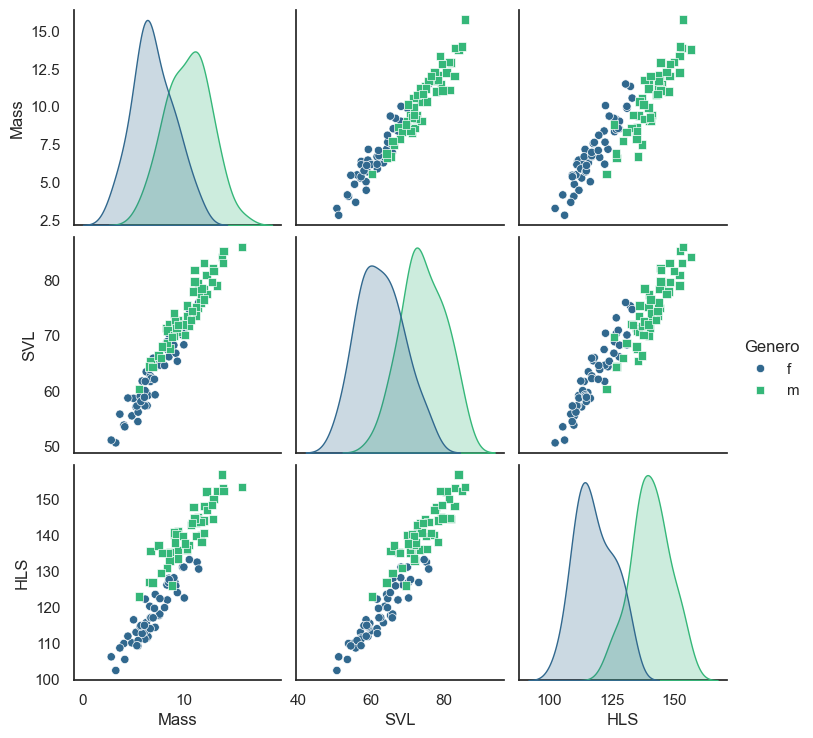

In [26]:
print("Scatter plots matrix - MVD Normal Sample")
features = ['Mass','SVL','HLS', 'Genero']
sns.set_theme(style="white", palette=None)
smp = sns.pairplot(mvd_normal_sample[features],hue="Genero",diag_kind='kde',palette="viridis", markers=["o", "s"])


A continuación mostramos los datos originales y los simulados por Genero. 

In [27]:
features = ['Mass','SVL','HLS']
male_original_df=lagartijas_df[lagartijas_df['Genero']=='m'][features]
male_original_df['Genero']='male_original'

male_simulated_df=mvd_normal_sample_male_df
male_simulated_df['Genero']='male_simulated'

male_original_and_simulated = pd.concat([male_original_df, male_simulated_df], axis=0)


Scatter plots matrix - Original Data and MVD Normal Sample


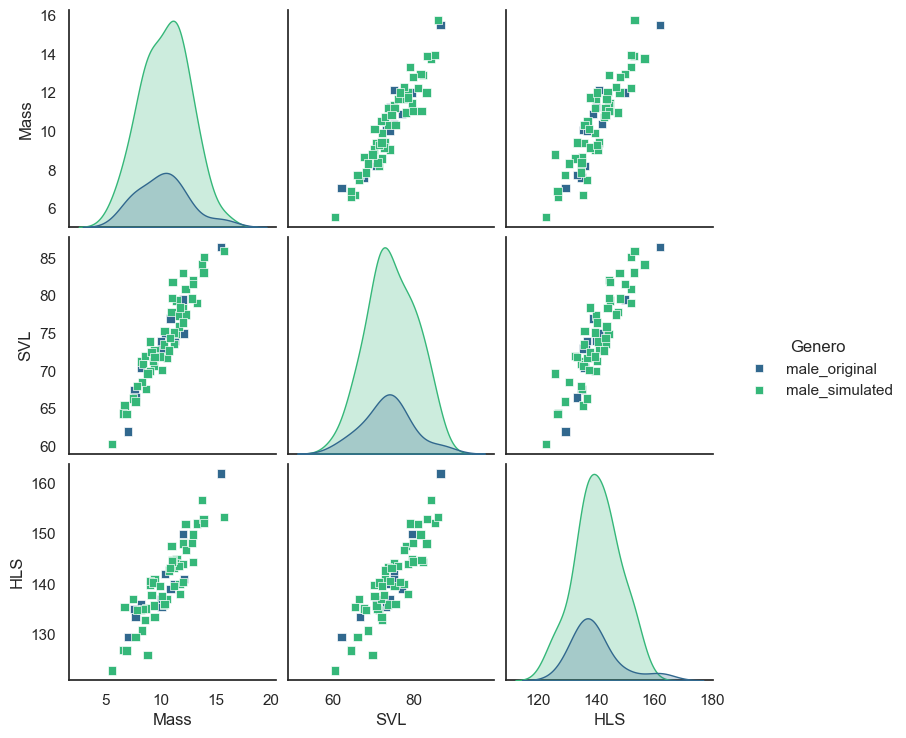

In [28]:
print("Scatter plots matrix - Original Data and MVD Normal Sample")
features = ['Mass','SVL','HLS', 'Genero']
sns.set_theme(style="white", palette=None)
smp = sns.pairplot(male_original_and_simulated[features],hue="Genero",diag_kind='kde',palette="viridis", markers=["s", "s"])

In [29]:
features = ['Mass','SVL','HLS']
female_original_df=lagartijas_df[lagartijas_df['Genero']=='f'][features]
female_original_df['Genero']='female_original'

female_simulated_df=mvd_normal_sample_female_df
female_simulated_df['Genero']='female_simulated'

female_original_and_simulated = pd.concat([female_original_df, female_simulated_df], axis=0)



Scatter plots matrix - Original Data and MVD Normal Sample


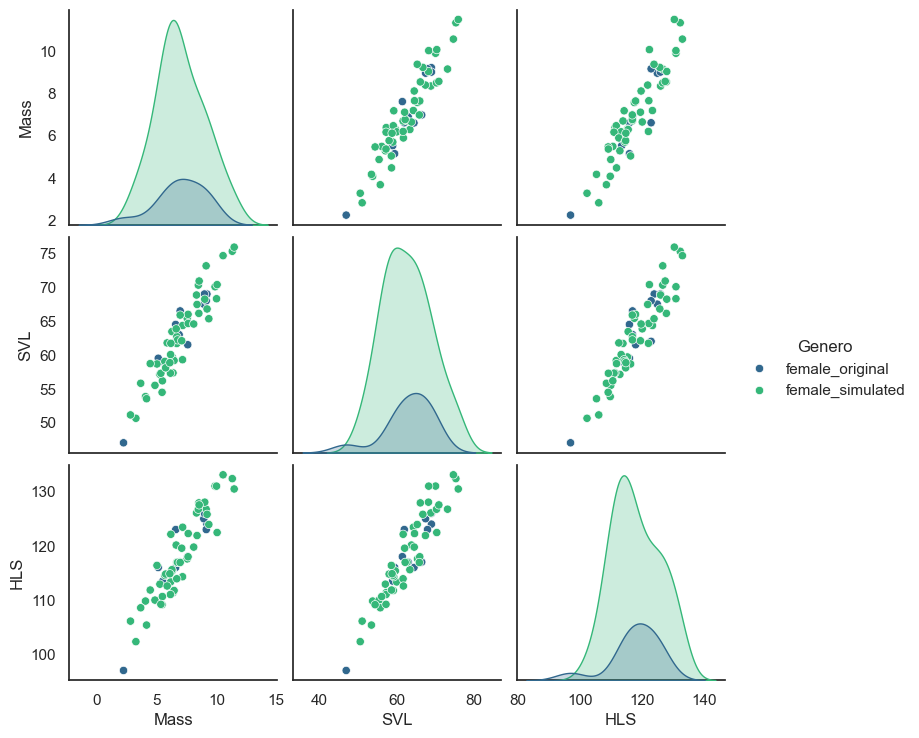

In [30]:
print("Scatter plots matrix - Original Data and MVD Normal Sample")
features = ['Mass','SVL','HLS', 'Genero']
sns.set_theme(style="white", palette=None)
smp = sns.pairplot(female_original_and_simulated[features],hue="Genero",diag_kind='kde',palette="viridis", markers=["o", "o"])

**d)** Detectar especímenes reales atípicos por el método de la elipse, para hembras y machos.

**Para machos y hembras: Variables Mass y SVL**

In [31]:
features = ['Mass','SVL','HLS']
sigma = lagartijas_df[features].cov()
eigenValues, eigenVectors = np.linalg.eigh(sigma)
idx = eigenValues.argsort()[::-1]
#eigenValues[idx]
#eigenVectors[idx]
idx

array([2, 1, 0], dtype=int64)

In [32]:
from matplotlib.patches import Ellipse
from scipy.stats import chi2

features = ['Mass','SVL','HLS']
dataset_df=lagartijas_df[features]

def computeMaximumLikelihoodEstimators(dataset_df,columns):
    mu = list(dataset_df[columns].mean())
    sigma = np.matrix(dataset_df[columns].cov())
    return mu, sigma

def diagonalize(sigma):
    eigenValues, eigenVectors = np.linalg.eigh(sigma)
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues, eigenVectors

def plotConfidenceEllipse(plt,mu,eigenValues,eigenVectors,chiSquaredCriticalVale,ax=None,**kwargs):
    if ax is None:
        ax = plt.gca()
    theta = np.degrees(np.arctan2(*eigenVectors[:,0][::-1]))
    width,height = chiSquaredCriticalVale*np.sqrt(eigenValues)
    confidenceEllipse = Ellipse(xy=mu,width=width,height=height,angle=theta,**kwargs)
    ax.add_artist(confidenceEllipse)
    return confidenceEllipse

def getProbabilityDensityContour(plt,dataset_df,columns,alpha,freedomDegrees,color,name='DataSet'):
    mu, sigma = computeMaximumLikelihoodEstimators(dataset_df,columns)
    eigenValues, eigenVectors = diagonalize(sigma)
    chiSquaredCriticalVale = chi2.ppf(q=(1-alpha),df=freedomDegrees)
    plotConfidenceEllipse(plt,mu,eigenValues,eigenVectors,chiSquaredCriticalVale,color=color,alpha=0.1)
    sumaryTable=[]
    sumaryTable.append(['Mean',mu])
    sumaryTable.append(['Covariance matrix',sigma])
    sumaryTable.append(['EigenValues',eigenValues])
    sumaryTable.append(['EigenVectors',eigenVectors])
    sumaryTable.append(['Confidence',1-alpha])
    sumaryTable.append(['Chi-squared critical value',chiSquaredCriticalVale])
    sumaryTableDF = pd.DataFrame(sumaryTable,columns=['Summary',name])
    return sumaryTableDF

def scatterPlot(plt,dataset_df,col_1,col_2,color):
    dataset_df = dataset_df[[col_1,col_2]]
    plt.scatter(dataset_df[col_1],dataset_df[col_2],color=color)

Confidence Ellipse & Probability Density Contour - Male and Female Original Data


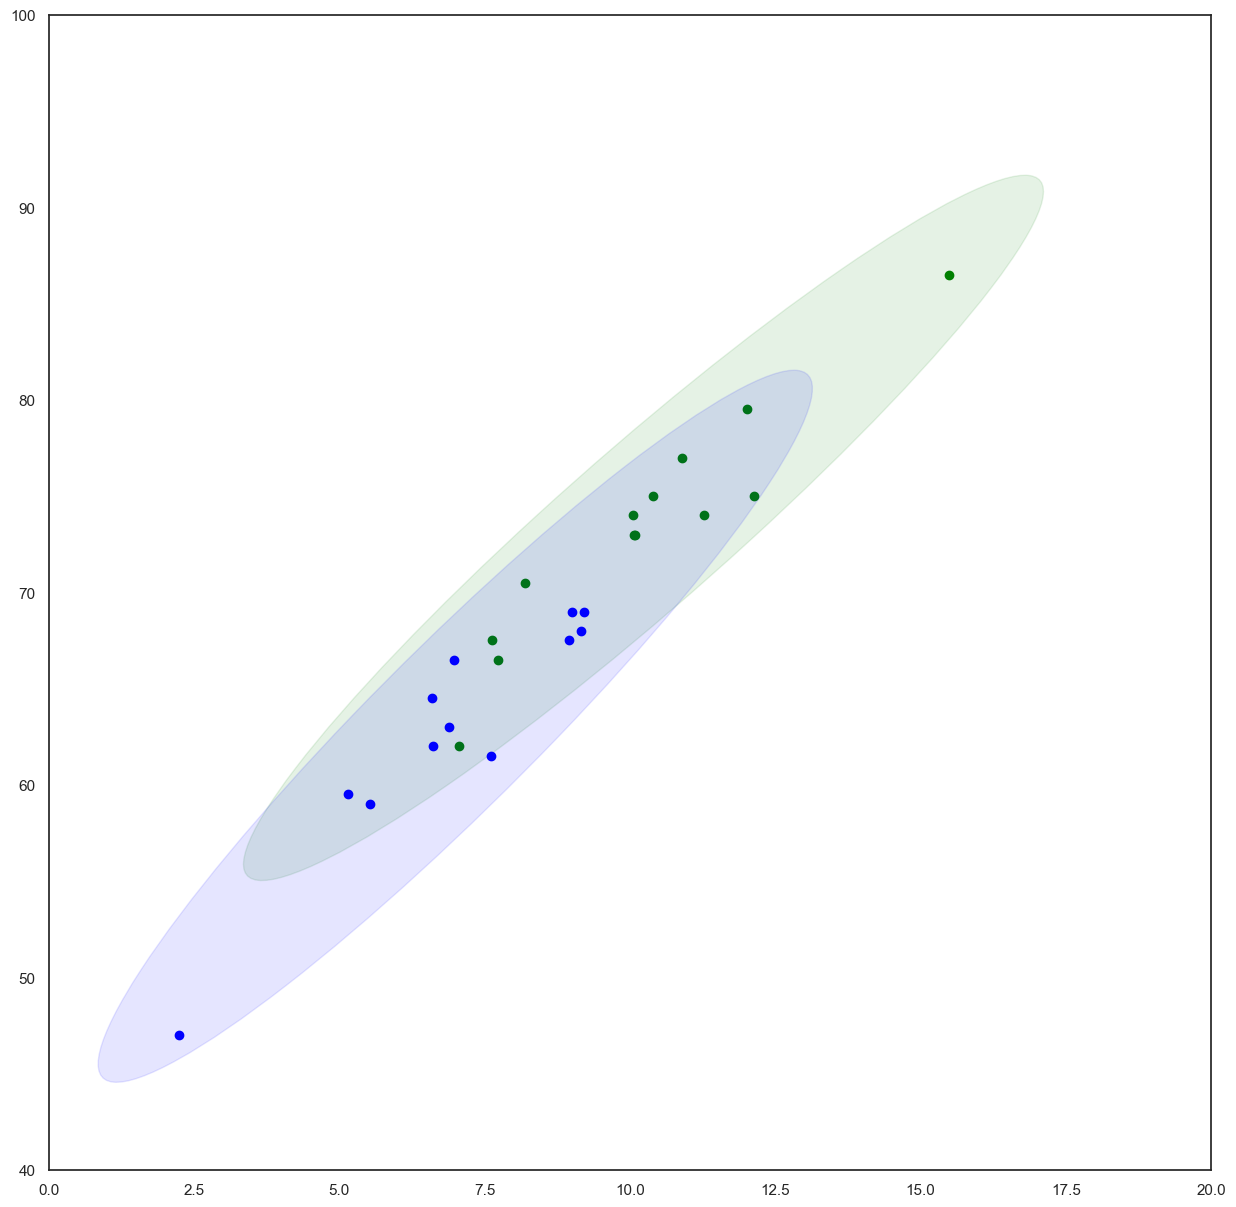

,Summary,male
0,Mean,"[10.232769230769232, 73.34615384615384]"
1,Covariance matrix,"[[[[[ 5.27692719 13.39746154]]]], [[[[13.39746154 37.39102564]]]]]"
2,EigenValues,"[42.24619307268006, 0.42175976065328946]"
3,EigenVectors,"[[[[[ 0.34071172 -0.94016782]]]], [[[[0.94016782 0.34071172]]]]]"
4,Confidence,0.95
5,Chi-squared critical value,5.991465


,Summary,female
0,Mean,"[6.994924999999999, 63.041666666666664]"
1,Covariance matrix,"[[[[[ 4.20638563 12.00953523]]]], [[[[12.00953523 38.11174242]]]]]"
2,EigenValues,"[41.93458426647187, 0.38354378890691354]"
3,EigenVectors,"[[[[[ 0.30332081 -0.95288849]]]], [[[[0.95288849 0.30332081]]]]]"
4,Confidence,0.95
5,Chi-squared critical value,5.991465


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

#plt.style.use("seaborn-bright")

male_df= lagartijas_df[lagartijas_df['Genero']=='m']
female_df = lagartijas_df[lagartijas_df['Genero']=='f']

col_1,col_2='Mass', 'SVL'

cols=[col_1,col_2]
alpha=0.05
df=2
plt.figure(figsize=(15,15))
plt.axis([0,20,40,100])


scatterPlot(plt,male_df,col_1,col_2,'Green')
summary_male_df = getProbabilityDensityContour(plt,male_df,[col_1,col_2],alpha,df,\
                                             color='Green',name='male')

scatterPlot(plt,female_df,col_1,col_2,'Blue')
summary_female_df = getProbabilityDensityContour(plt,female_df,[col_1,col_2],alpha,df,\
                                             color='Blue',name='female')

print("Confidence Ellipse & Probability Density Contour - Male and Female Original Data")
plt.show()
display(summary_male_df)
display(summary_female_df)


Confidence Ellipse & Probability Density Contour - Male Simulated Data


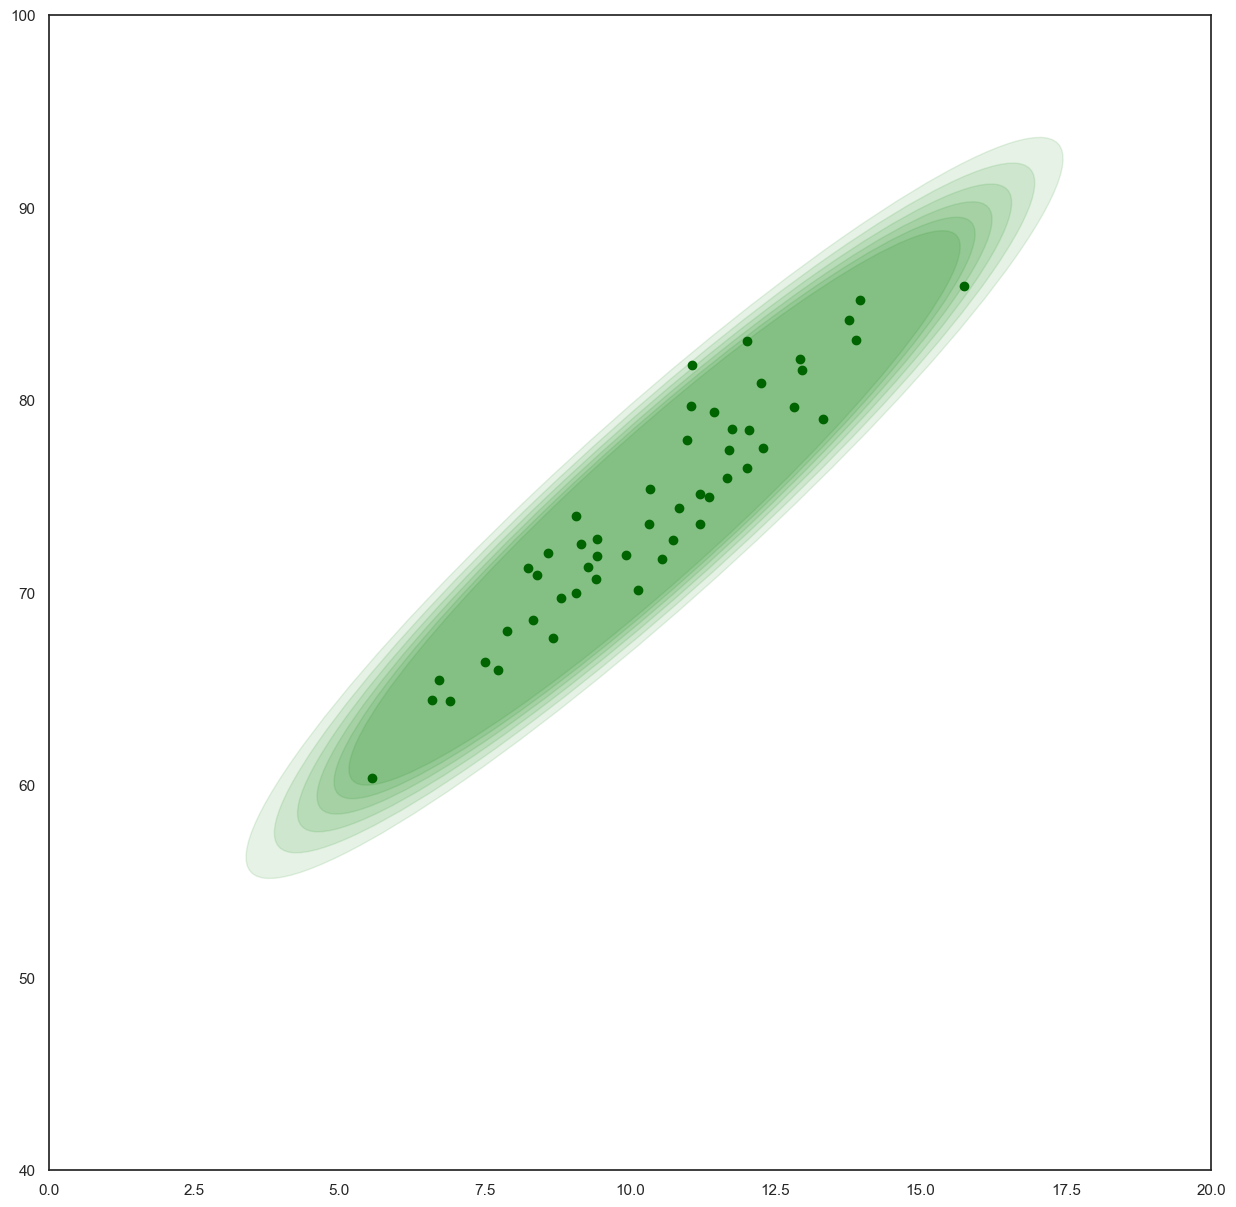

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.axis([0,20,40,100])

mu, sigma = computeMaximumLikelihoodEstimators(mvd_normal_sample_male_df,['Mass','SVL'])
eigenValues, eigenVectors = diagonalize(sigma)
chiSquaredCriticalVale = chi2.ppf(q=(1-alpha),df=2)

for i in range(0,6):
    confidence=(1-0.96)+i*0.01
    getProbabilityDensityContour(plt,mvd_normal_sample_male_df,['Mass','SVL'],confidence,2,color='Green')

print("Confidence Ellipse & Probability Density Contour - Male Simulated Data")
scatterPlot(plt,mvd_normal_sample_male_df,'Mass','SVL','Darkgreen')

Confidence Ellipse & Probability Density Contour - Female Simulated Data


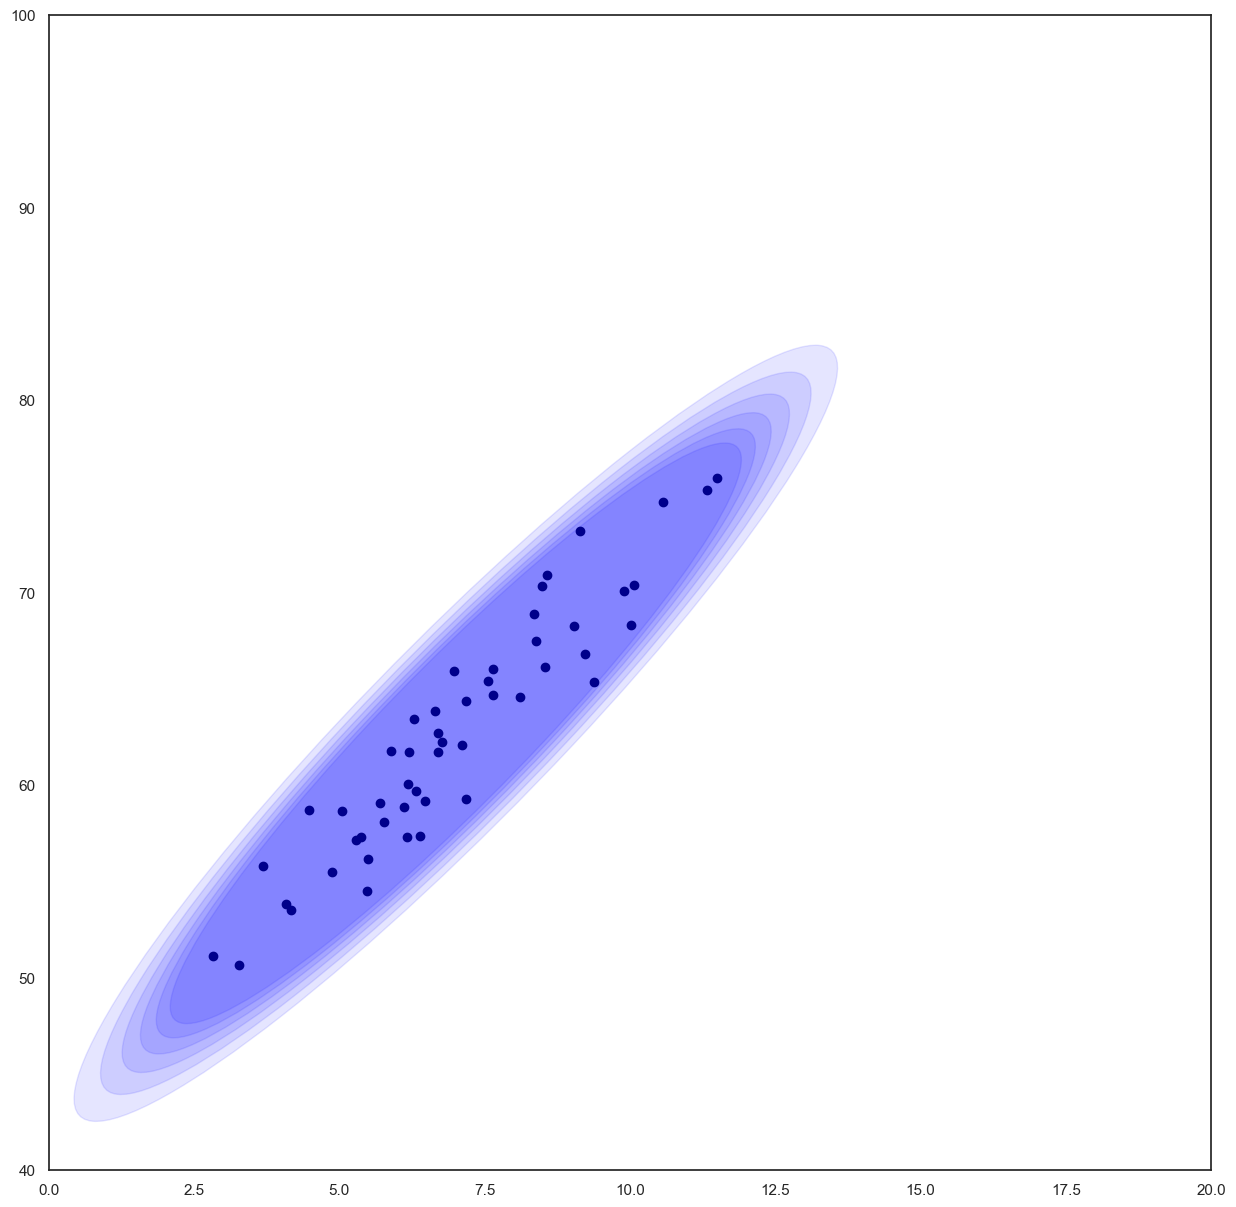

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.axis([0,20,40,100])

mu, sigma = computeMaximumLikelihoodEstimators(mvd_normal_sample_female_df,['Mass','SVL'])
eigenValues, eigenVectors = diagonalize(sigma)
chiSquaredCriticalVale = chi2.ppf(q=(1-alpha),df=2)

for i in range(0,6):
    confidence=(1-0.96)+i*0.01
    getProbabilityDensityContour(plt,mvd_normal_sample_female_df,['Mass','SVL'],confidence,2,color='Blue')

print("Confidence Ellipse & Probability Density Contour - Female Simulated Data")
scatterPlot(plt,mvd_normal_sample_female_df,'Mass','SVL','Darkblue')

In [36]:
from matplotlib.patches import Ellipse
from scipy.stats import chi2

features = ['Mass','SVL','HLS']
dataset_df=mvd_normal_sample[features]

def computeMaximumLikelihoodEstimators(dataset_df,columns):
    mu = list(dataset_df[columns].mean())
    sigma = np.matrix(dataset_df[columns].cov())
    return mu, sigma

def diagonalize(sigma):
    eigenValues, eigenVectors = np.linalg.eigh(sigma)
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues, eigenVectors

def plotConfidenceEllipse(plt,mu,eigenValues,eigenVectors,chiSquaredCriticalVale,ax=None,**kwargs):
    if ax is None:
        ax = plt.gca()
    theta = np.degrees(np.arctan2(*eigenVectors[:,0][::-1]))
    width,height = chiSquaredCriticalVale*np.sqrt(eigenValues)
    confidenceEllipse = Ellipse(xy=mu,width=width,height=height,angle=theta,**kwargs)
    ax.add_artist(confidenceEllipse)
    return confidenceEllipse

def getProbabilityDensityContour(plt,dataset_df,columns,alpha,freedomDegrees,color,name='DataSet'):
    mu, sigma = computeMaximumLikelihoodEstimators(dataset_df,columns)
    eigenValues, eigenVectors = diagonalize(sigma)
    chiSquaredCriticalVale = chi2.ppf(q=(1-alpha),df=freedomDegrees)
    plotConfidenceEllipse(plt,mu,eigenValues,eigenVectors,chiSquaredCriticalVale,color=color,alpha=0.1)
    sumaryTable=[]
    sumaryTable.append(['Mean',mu])
    sumaryTable.append(['Covariance matrix',sigma])
    sumaryTable.append(['EigenValues',eigenValues])
    sumaryTable.append(['EigenVectors',eigenVectors])
    sumaryTable.append(['Confidence',1-alpha])
    sumaryTable.append(['Chi-squared critical value',chiSquaredCriticalVale])
    sumaryTableDF = pd.DataFrame(sumaryTable,columns=['Summary',name])
    return sumaryTableDF

def scatterPlot(plt,dataset_df,col_1,col_2,color):
    dataset_df = dataset_df[[col_1,col_2]]
    plt.scatter(dataset_df[col_1],dataset_df[col_2],color=color)

Confidence Ellipse & Probability Density Contour - Male and Female Simulated Data


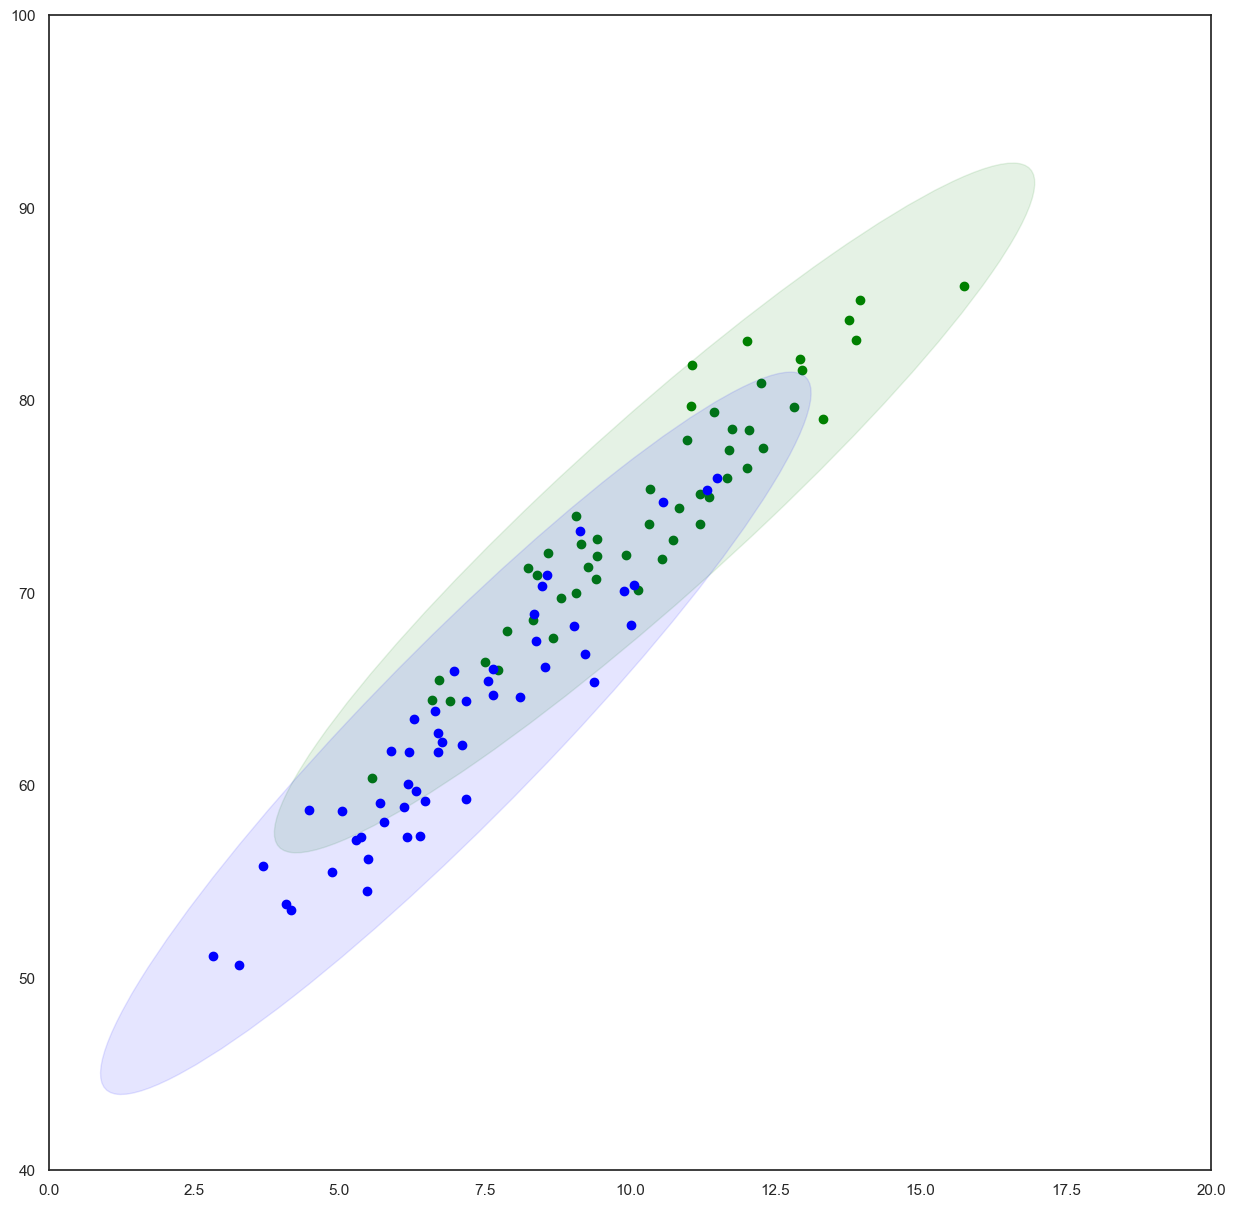

,Summary,male
0,Mean,"[10.423568252391215, 74.3825092705776]"
1,Covariance matrix,"[[[[[ 4.76721198 12.30582246]]]], [[[[12.30582246 35.75891411]]]]]"
2,EigenValues,"[40.05080335624227, 0.4753227373353086]"
3,EigenVectors,"[[[[[ 0.32931473 -0.94422021]]]], [[[[0.94422021 0.32931473]]]]]"
4,Confidence,0.95
5,Chi-squared critical value,5.991465


,Summary,female
0,Mean,"[7.004248646903411, 62.675185596603654]"
1,Covariance matrix,"[[[[[ 4.16299805 12.03947935]]]], [[[[12.03947935 39.22438772]]]]]"
2,EigenValues,"[42.960435102111134, 0.42695066604944154]"
3,EigenVectors,"[[[[[ 0.29637441 -0.95507183]]]], [[[[0.95507183 0.29637441]]]]]"
4,Confidence,0.95
5,Chi-squared critical value,5.991465


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

#plt.style.use("seaborn-bright")

male_df= mvd_normal_sample[mvd_normal_sample['Genero']=='m']
female_df = mvd_normal_sample[mvd_normal_sample['Genero']=='f']

col_1,col_2='Mass', 'SVL'

cols=[col_1,col_2]
alpha=0.05
df=2
plt.figure(figsize=(15,15))
plt.axis([0,20,40,100])


scatterPlot(plt,male_df,col_1,col_2,'Green')
summary_male_df = getProbabilityDensityContour(plt,male_df,[col_1,col_2],alpha,df,\
                                             color='Green',name='male')

scatterPlot(plt,female_df,col_1,col_2,'Blue')
summary_female_df = getProbabilityDensityContour(plt,female_df,[col_1,col_2],alpha,df,\
                                             color='Blue',name='female')

print("Confidence Ellipse & Probability Density Contour - Male and Female Simulated Data")
plt.show()
display(summary_male_df)
display(summary_female_df)